In [1]:
import pandas as pd

In [3]:
!ls data/hcredit

application_test.csv	     df_test_scaled_mod_pca.csv
application_test.csv.zip     df_train_scaled.csv
application_train.csv	     df_train_scaled_mod.csv
application_train.csv.zip    df_train_scaled_mod_pca.csv
bureau_balance.csv	     grp_bureau.csv
bureau_balance.csv.zip	     HomeCredit_columns_description.csv
bureau.csv		     installments_payments.csv
bureau.csv.zip		     installments_payments.csv.zip
credit_card_balance.csv      pca_log_reg.csv
credit_card_balance.csv.zip  pca_log_reg_v2.csv
df_bureau_and_balance.csv    POS_CASH_balance.csv
df_cash_bal.csv		     POS_CASH_balance.csv.zip
df_credit_mod.csv	     previous_application.csv
df_payments.csv		     previous_application.csv.zip
df_prev_app_mod.csv	     sample_submission.csv
df_test_scaled.csv	     sample_submission.csv.zip
df_test_scaled_mod.csv


# for training data

In [4]:
df_train = pd.read_csv('data/hcredit/application_train.csv')

In [5]:
df_train.shape

(307511, 122)

In [6]:
""" Due to large number of attributes (122),let's check whether all of them are relevant"""
null_col = df_train.isnull().sum()

In [7]:
null_col = null_col[null_col > 0]

In [8]:
df_null_col = pd.DataFrame(null_col,columns=['count'])

In [9]:
df_null_col = df_null_col.reset_index()
df_null_col

,index,count
0,AMT_ANNUITY,12
1,AMT_GOODS_PRICE,278
2,NAME_TYPE_SUITE,1292
3,OWN_CAR_AGE,202929
4,OCCUPATION_TYPE,96391
5,CNT_FAM_MEMBERS,2
6,EXT_SOURCE_1,173378
7,EXT_SOURCE_2,660
8,EXT_SOURCE_3,60965
9,APARTMENTS_AVG,156061


In [10]:
df_null_col['Total'] = 307511

In [11]:
df_null_col.columns

Index(['index', 'count', 'Total'], dtype='object')

In [12]:
df_null_col['Percentage_null'] = (df_null_col['count'] / df_null_col['Total']) *100

In [13]:
# To take in attributes who have less than 40% (aribitrary cutoff) missing values.
na_lessthan_40 = df_null_col[df_null_col['Percentage_null']<40.0]['index']

In [14]:
null_col = df_train.isnull().sum()

In [15]:
no_null_col = null_col[null_col == 0]

In [16]:
set(na_lessthan_40)

{'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OCCUPATION_TYPE'}

In [17]:
no_null_col = no_null_col.reset_index()

In [18]:
# column names where either we have data for all the rows or only <40% has NaN
cols = set(no_null_col['index']).union(na_lessthan_40)

In [19]:
cols

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',

In [20]:
df_train = df_train.filter(items=cols)

In [21]:
ID = df_train['SK_ID_CURR']
TARGET = df_train['TARGET']

In [23]:
# Predictors / Dependend variables that will be used for modeling.
predictors = [col for col in df_train.columns if col not in ['SK_ID_CURR','TARGET']]

In [24]:
df_train_wip = df_train.filter(items=predictors)

In [682]:
del df_train_cont

In [25]:
# Selecting the continuous variables for pre-processing & engineering.
df_train_cont = df_train_wip.select_dtypes(exclude=['object'])

In [26]:
for c in df_train_cont.columns:
    df_train_cont[c].fillna(round(df_train_cont[c].mean(),4),inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [651]:
del df_train_cat

In [27]:
# Selecting the categorical variables for pre-processing & engineering.
df_train_cat = df_train_wip.select_dtypes(include=['object'])

In [28]:
# Assessing the volume of Null values within Categorical variables.
df_train_cat.isnull().sum()

ORGANIZATION_TYPE                 0
FLAG_OWN_CAR                      0
NAME_CONTRACT_TYPE                0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_FAMILY_STATUS                0
WEEKDAY_APPR_PROCESS_START        0
NAME_HOUSING_TYPE                 0
NAME_EDUCATION_TYPE               0
FLAG_OWN_REALTY                   0
CODE_GENDER                       0
OCCUPATION_TYPE               96391
dtype: int64

For the purpose of feature engineering , converting categorical to numeric vectors the challenge isnt to blow up the feature space but still come up with meaningful consolidation. The following sequence of steps is to assess and engineer the feature.
1. Fill the null with mode value
2. Consolidate / Aggregate the categories(n) into 'm' categories, m < n
3. If the categorical values have binary values, map them

In [29]:
df_train_cat['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [30]:
df_train_cat['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [562]:
df_train_cat['NAME_TYPE_SUITE'].isnull().sum()

0

In [31]:
df_train_cat['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [32]:
df_train_cat['OCCUPATION_TYPE'].fillna('Laborers',inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
# grouping all the categories containing the word 'staff' into one category
df_train_cat['OCCUPATION_TYPE_STAFF'] = df_train_cat['OCCUPATION_TYPE'].str.contains("staff")

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [566]:
df_train_cat.head()

,OCCUPATION_TYPE,CODE_GENDER,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_TYPE_SUITE,FLAG_OWN_REALTY,FLAG_OWN_CAR,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE_STAFF
0,Laborers,M,WEDNESDAY,Business Entity Type 3,Unaccompanied,Y,N,Single / not married,Secondary / secondary special,Working,Cash loans,House / apartment,False
1,Core staff,F,MONDAY,School,Family,N,N,Married,Higher education,State servant,Cash loans,House / apartment,True
2,Laborers,M,MONDAY,Government,Unaccompanied,Y,Y,Single / not married,Secondary / secondary special,Working,Revolving loans,House / apartment,False
3,Laborers,F,WEDNESDAY,Business Entity Type 3,Unaccompanied,Y,N,Civil marriage,Secondary / secondary special,Working,Cash loans,House / apartment,False
4,Core staff,M,THURSDAY,Religion,Unaccompanied,Y,N,Single / not married,Secondary / secondary special,Working,Cash loans,House / apartment,True


In [34]:
# Mapping the binary values into numeric and dropping the original column, one hot enconding 
code_gender_map = {'M':'1','F':'0'}

In [35]:
df_train_cat['CODE_GENDER_MALE'] = df_train_cat['CODE_GENDER'].map(code_gender_map)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_train_cat['CODE_GENDER_MALE'].fillna('0',inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
df_train_cat.drop(['CODE_GENDER'],axis=1,inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
value_map = {'Y':'1','N':'0'}
OCCUPATION_TYPE_STAFF_MAP = {'True':'1','False':'0'}

In [39]:
df_train_cat['FLAG_OWN_REALTY_YES'] = df_train_cat['FLAG_OWN_REALTY'].map(value_map)
df_train_cat.drop(['FLAG_OWN_REALTY'],axis=1,inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [40]:
df_train_cat['FLAG_OWN_CAR_YES'] = df_train_cat['FLAG_OWN_CAR'].map(value_map)
df_train_cat.drop(['FLAG_OWN_CAR'],axis=1,inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [41]:
df_train_cat['OCCUPATION_TYPE_STAFF'] = df_train_cat['OCCUPATION_TYPE_STAFF'].map(OCCUPATION_TYPE_STAFF_MAP)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_train_cat.drop(['OCCUPATION_TYPE_STAFF'],axis=1,inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [430]:
df_train_cat.columns[1:-4]

Index(['WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_TYPE_SUITE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE',
       'NAME_CONTRACT_TYPE'],
      dtype='object')

In [43]:
df_train_cat['ORGANIZATION_TYPE_Industry'] = df_train_cat['ORGANIZATION_TYPE'].str.contains('Industry',na=False)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_train_cat['ORGANIZATION_TYPE_Industry'] = df_train_cat['ORGANIZATION_TYPE_Industry'].astype(int)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_train_cat['OCCUPATION_TYPE_STAFF'] = df_train_cat['OCCUPATION_TYPE'].str.contains('staff',na=False)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_train_cat['OCCUPATION_TYPE_STAFF'] = df_train_cat['OCCUPATION_TYPE_STAFF'].astype(int)
df_train_cat['OCCUPATION_TYPE_STAFF']

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0         0
1         1
2         0
3         0
4         1
5         0
6         0
7         0
8         0
9         0
10        1
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        1
20        0
21        1
22        1
23        0
24        0
25        1
26        1
27        0
28        0
29        0
         ..
307481    0
307482    0
307483    0
307484    0
307485    1
307486    0
307487    0
307488    1
307489    1
307490    0
307491    0
307492    1
307493    1
307494    0
307495    1
307496    1
307497    1
307498    0
307499    1
307500    0
307501    0
307502    0
307503    1
307504    1
307505    0
307506    1
307507    0
307508    0
307509    0
307510    0
Name: OCCUPATION_TYPE_STAFF, Length: 307511, dtype: int64

In [439]:
df_train_cat

,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_TYPE_SUITE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,CODE_GENDER_MALE,FLAG_OWN_REALTY_YES,FLAG_OWN_CAR_YES,ORGANIZATION_TYPE_Industry,OCCUPATION_TYPE_STAFF
0,Laborers,WEDNESDAY,Business Entity Type 3,Unaccompanied,Single / not married,Secondary / secondary special,Working,Cash loans,House / apartment,1,1,0,0,0
1,Core staff,MONDAY,School,Family,Married,Higher education,State servant,Cash loans,House / apartment,0,0,0,0,1
2,Laborers,MONDAY,Government,Unaccompanied,Single / not married,Secondary / secondary special,Working,Revolving loans,House / apartment,1,1,1,0,0
3,Laborers,WEDNESDAY,Business Entity Type 3,Unaccompanied,Civil marriage,Secondary / secondary special,Working,Cash loans,House / apartment,0,1,0,0,0
4,Core staff,THURSDAY,Religion,Unaccompanied,Single / not married,Secondary / secondary special,Working,Cash loans,House / apartment,1,1,0,0,1
5,Laborers,WEDNESDAY,Other,"Spouse, partner",Married,Secondary / secondary special,State servant,Cash loans,House / apartment,1,1,0,0,0
6,Accountants,SUNDAY,Business Entity Type 3,Unaccompanied,Married,Higher education,Commercial associate,Cash loans,House / apartment,0,1,1,0,0
7,Managers,MONDAY,Other,Unaccompanied,Married,Higher education,State servant,Cash loans,House / apartment,1,1,1,0,0
8,Laborers,WEDNESDAY,XNA,Children,Married,Secondary / secondary special,Pensioner,Cash loans,House / apartment,0,1,0,0,0
9,Laborers,THURSDAY,Electricity,Unaccompanied,Single / not married,Secondary / secondary special,Working,Revolving loans,House / apartment,1,1,0,0,0


In [47]:
df_train_cat['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [48]:
df_train_cat['ORGANIZATION_TYPE_Transport'] = df_train_cat['ORGANIZATION_TYPE'].str.contains('Transport',na=False)
df_train_cat['ORGANIZATION_TYPE_Transport'] = df_train_cat['ORGANIZATION_TYPE_Transport'].astype(int)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
df_train_cat['ORGANIZATION_TYPE_Business Entity'] = df_train_cat['ORGANIZATION_TYPE'].str.contains('Business Entity',na=False)
df_train_cat['ORGANIZATION_TYPE_Business Entity'] = df_train_cat['ORGANIZATION_TYPE_Business Entity'].astype(int)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
df_train_cat['ORGANIZATION_TYPE_XNA'] = df_train_cat['ORGANIZATION_TYPE'].str.contains('XNA',na=False)
df_train_cat['ORGANIZATION_TYPE_XNA'] = df_train_cat['ORGANIZATION_TYPE_XNA'].astype(int)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
df_train_cat['ORGANIZATION_TYPE_Other'] = df_train_cat['ORGANIZATION_TYPE'].str.contains('Other',na=False)
df_train_cat['ORGANIZATION_TYPE_Other'] = df_train_cat['ORGANIZATION_TYPE_Other'].astype(int)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
searchfor = ['Business Entity','Transport','Industry','XNA','Other']
df_train_cat['ORGANIZATION_TYPE_Misc'] = ~df_train_cat['ORGANIZATION_TYPE'].str.contains('|'.join(searchfor),na=False)
df_train_cat['ORGANIZATION_TYPE_Misc'] = df_train_cat['ORGANIZATION_TYPE_Misc'].astype(int)
df_train_cat.drop(['ORGANIZATION_TYPE'],axis=1,inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [444]:
df_train_cat

,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_TYPE_SUITE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,CODE_GENDER_MALE,FLAG_OWN_REALTY_YES,FLAG_OWN_CAR_YES,ORGANIZATION_TYPE_Industry,OCCUPATION_TYPE_STAFF,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_Business Entity,ORGANIZATION_TYPE_XNA
0,Laborers,WEDNESDAY,Business Entity Type 3,Unaccompanied,Single / not married,Secondary / secondary special,Working,Cash loans,House / apartment,1,1,0,0,0,0,1,0
1,Core staff,MONDAY,School,Family,Married,Higher education,State servant,Cash loans,House / apartment,0,0,0,0,1,0,0,0
2,Laborers,MONDAY,Government,Unaccompanied,Single / not married,Secondary / secondary special,Working,Revolving loans,House / apartment,1,1,1,0,0,0,0,0
3,Laborers,WEDNESDAY,Business Entity Type 3,Unaccompanied,Civil marriage,Secondary / secondary special,Working,Cash loans,House / apartment,0,1,0,0,0,0,1,0
4,Core staff,THURSDAY,Religion,Unaccompanied,Single / not married,Secondary / secondary special,Working,Cash loans,House / apartment,1,1,0,0,1,0,0,0
5,Laborers,WEDNESDAY,Other,"Spouse, partner",Married,Secondary / secondary special,State servant,Cash loans,House / apartment,1,1,0,0,0,0,0,0
6,Accountants,SUNDAY,Business Entity Type 3,Unaccompanied,Married,Higher education,Commercial associate,Cash loans,House / apartment,0,1,1,0,0,0,1,0
7,Managers,MONDAY,Other,Unaccompanied,Married,Higher education,State servant,Cash loans,House / apartment,1,1,1,0,0,0,0,0
8,Laborers,WEDNESDAY,XNA,Children,Married,Secondary / secondary special,Pensioner,Cash loans,House / apartment,0,1,0,0,0,0,0,1
9,Laborers,THURSDAY,Electricity,Unaccompanied,Single / not married,Secondary / secondary special,Working,Revolving loans,House / apartment,1,1,0,0,0,0,0,0


In [53]:
df_train_cat['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [54]:
df_train_cat['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [55]:
value_map = {'Cash loans':'1','Revolving loans':'0'}

In [56]:
df_train_cat['NAME_CONTRACT_TYPE_CASH'] = df_train_cat['NAME_CONTRACT_TYPE'].map(value_map)
df_train_cat.drop(['NAME_CONTRACT_TYPE'],axis=1,inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:
df_train_cat['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [58]:
df_train_cat['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [59]:
df_train_cat['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [60]:
df_train_cat['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [61]:
df_train_cat = pd.get_dummies(df_train_cat,prefix_sep='_',columns=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','NAME_HOUSING_TYPE'],drop_first=True)

In [587]:
df_train_cat.columns

Index(['OCCUPATION_TYPE', 'OCCUPATION_TYPE_STAFF', 'CODE_GENDER_MALE',
       'FLAG_OWN_REALTY_YES', 'FLAG_OWN_CAR_YES', 'ORGANIZATION_TYPE_Industry',
       'ORGANIZATION_TYPE_Transport', 'ORGANIZATION_TYPE_Business Entity',
       'ORGANIZATION_TYPE_XNA', 'ORGANIZATION_TYPE_Misc',
       'NAME_CONTRACT_TYPE_CASH', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Unknown',
       'NAME_FAMILY_STATUS_Widow', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUIT

In [62]:
df_train_cat['OCCUPATION_TYPE'].value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [63]:
df_train_cat = pd.get_dummies(df_train_cat,prefix_sep='_',columns=['OCCUPATION_TYPE'],drop_first=True)

In [64]:
df_train_cat = df_train_cat[df_train_cat.columns.drop(list(df_train_cat.filter(regex='staff')))]

In [65]:
df_train_cat.drop(['NAME_FAMILY_STATUS_Unknown'],axis=1,inplace=True)
df_train_cat.drop(['NAME_INCOME_TYPE_Maternity leave'],axis=1,inplace=True)

In [680]:
df_train_cat.columns

Index(['CODE_GENDER_MALE', 'FLAG_OWN_REALTY_YES', 'FLAG_OWN_CAR_YES',
       'ORGANIZATION_TYPE_Industry', 'OCCUPATION_TYPE_STAFF',
       'ORGANIZATION_TYPE_Transport', 'ORGANIZATION_TYPE_Business Entity',
       'ORGANIZATION_TYPE_XNA', 'ORGANIZATION_TYPE_Other',
       'ORGANIZATION_TYPE_Misc', 'NAME_CONTRACT_TYPE_CASH',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people',
       'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()
df_train_cont_scaled = scaler.fit_transform(df_train_cont)

In [68]:
df_train_cont_scaled.shape

(307511, 59)

In [69]:
cont_col_nm = df_train_wip.select_dtypes(exclude=['object']).columns

In [636]:
#df_train_cont.
cont_col = len(df_train_wip.select_dtypes(exclude=['object']).columns)

In [691]:
len(df_train_cont.columns)

59

In [70]:
df_train_cont_v2 = pd.DataFrame(df_train_cont_scaled,columns= cont_col_nm)

In [71]:
df_train_mod = pd.concat([df_train_cat,df_train_cont_v2],axis=1)

In [72]:
df_train_mod.columns

Index(['CODE_GENDER_MALE', 'FLAG_OWN_REALTY_YES', 'FLAG_OWN_CAR_YES',
       'ORGANIZATION_TYPE_Industry', 'OCCUPATION_TYPE_STAFF',
       'ORGANIZATION_TYPE_Transport', 'ORGANIZATION_TYPE_Business Entity',
       'ORGANIZATION_TYPE_XNA', 'ORGANIZATION_TYPE_Other',
       'ORGANIZATION_TYPE_Misc',
       ...
       'FLAG_DOCUMENT_2', 'FLAG_CONT_MOBILE', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_DOCUMENT_8', 'HOUR_APPR_PROCESS_START', 'FLAG_DOCUMENT_3',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_6', 'AMT_CREDIT'],
      dtype='object', length=107)

In [73]:
train_X = df_train_mod.values

In [74]:
df_train_mod.isnull().sum()

CODE_GENDER_MALE                                     0
FLAG_OWN_REALTY_YES                                  0
FLAG_OWN_CAR_YES                                     0
ORGANIZATION_TYPE_Industry                           0
OCCUPATION_TYPE_STAFF                                0
ORGANIZATION_TYPE_Transport                          0
ORGANIZATION_TYPE_Business Entity                    0
ORGANIZATION_TYPE_XNA                                0
ORGANIZATION_TYPE_Other                              0
ORGANIZATION_TYPE_Misc                               0
NAME_CONTRACT_TYPE_CASH                              0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Unemployed                          0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCA

In [75]:
type(train_X)

numpy.ndarray

In [77]:
y1 = df_train['TARGET']
len(y1)

307511

In [78]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [79]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [80]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [81]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [82]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(train_X,y1), verbose=3, random_state=1001 )

In [83]:
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(train_X,y1)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] subsample=1.0, min_child_weight=5, max_depth=3, gamma=5, colsample_bytree=1.0 
[CV] subsample=1.0, min_child_weight=5, max_depth=3, gamma=5, colsample_bytree=1.0 
[CV] subsample=1.0, min_child_weight=5, max_depth=3, gamma=5, colsample_bytree=1.0 
[CV] subsample=0.6, min_child_weight=1, max_depth=5, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, min_child_weight=5, max_depth=3, gamma=5, colsample_bytree=1.0, score=0.7464479998732919, total= 3.9min
[CV] subsample=0.6, min_child_weight=1, max_depth=5, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, min_child_weight=5, max_depth=3, gamma=5, colsample_bytree=1.0, score=0.7459212500856449, total= 4.0min
[CV]  subsample=1.0, min_child_weight=5, max_depth=3, gamma=5, colsample_bytree=1.0, score=0.7484302842228666, total= 4.0min
[CV] subsample=0.6, min_child_weight=1, max_depth=5, gamma=1.5, colsample_bytree=0.8 
[CV] subsample=0.8, min_child_weight=5, max_depth=5, ga

[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 24.4min finished



 Time taken: 0 hours 34 minutes and 40.3 seconds.


# For test data

In [84]:
df_test = pd.read_csv('data/hcredit/application_test.csv')

In [85]:
df_test.shape

(48744, 121)

In [86]:
cols.remove("TARGET")

In [87]:
len(cols)

72

In [88]:
df_test = df_test.filter(items=cols)

In [89]:
df_test.shape

(48744, 72)

In [90]:
predictors = [col for col in df_test.columns if col not in ['SK_ID_CURR','TARGET']]

In [91]:
df_test_wip = df_test.filter(items=predictors)

In [92]:
df_test_cont = df_test_wip.select_dtypes(exclude=['object'])

In [93]:
for c in df_test_cont.columns:
    df_test_cont[c].fillna(round(df_test_cont[c].mean(),4),inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [94]:
df_test_cat = df_test_wip.select_dtypes(include=['object'])

In [95]:
df_test_cat.isnull().sum()

ORGANIZATION_TYPE                 0
FLAG_OWN_CAR                      0
NAME_CONTRACT_TYPE                0
NAME_TYPE_SUITE                 911
NAME_INCOME_TYPE                  0
NAME_FAMILY_STATUS                0
WEEKDAY_APPR_PROCESS_START        0
NAME_HOUSING_TYPE                 0
NAME_EDUCATION_TYPE               0
FLAG_OWN_REALTY                   0
CODE_GENDER                       0
OCCUPATION_TYPE               15605
dtype: int64

In [96]:
df_test_cat['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      39727
Family              5881
Spouse, partner     1448
Children             408
Other_B              211
Other_A              109
Group of people       49
Name: NAME_TYPE_SUITE, dtype: int64

In [97]:
df_test_cat['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [98]:
df_test_cat['OCCUPATION_TYPE'].value_counts()

Laborers                 8655
Sales staff              5072
Core staff               4361
Managers                 3574
Drivers                  2773
High skill tech staff    1854
Accountants              1628
Medicine staff           1316
Security staff            915
Cooking staff             894
Cleaning staff            656
Private service staff     455
Low-skill Laborers        272
Secretaries               213
Waiters/barmen staff      178
Realty agents             138
HR staff                  104
IT staff                   81
Name: OCCUPATION_TYPE, dtype: int64

In [99]:
df_test_cat['OCCUPATION_TYPE'].fillna('Laborers',inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [100]:
df_test_cat['OCCUPATION_TYPE_STAFF'] = df_test_cat['OCCUPATION_TYPE'].str.contains("staff")

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
df_test_cat['OCCUPATION_TYPE_STAFF'] = df_test_cat['OCCUPATION_TYPE_STAFF'].astype(int)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
df_test_cat['CODE_GENDER_MALE'] = df_test_cat['CODE_GENDER'].map(code_gender_map)
df_test_cat['CODE_GENDER_MALE'].fillna('0',inplace=True)
df_test_cat.drop(['CODE_GENDER'],axis=1,inplace=True)


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata

In [103]:
value_map = {'Y':'1','N':'0'}

In [104]:
df_test_cat['FLAG_OWN_REALTY_YES'] = df_test_cat['FLAG_OWN_REALTY'].map(value_map)
df_test_cat.drop(['FLAG_OWN_REALTY'],axis=1,inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [105]:
df_test_cat['FLAG_OWN_CAR_YES'] = df_test_cat['FLAG_OWN_CAR'].map(value_map)
df_test_cat.drop(['FLAG_OWN_CAR'],axis=1,inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [106]:
df_test_cat['ORGANIZATION_TYPE_Industry'] = df_test_cat['ORGANIZATION_TYPE'].str.contains('Industry',na=False)
df_test_cat['ORGANIZATION_TYPE_Industry'] = df_test_cat['ORGANIZATION_TYPE_Industry'].astype(int)


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [107]:
df_test_cat['ORGANIZATION_TYPE_Transport'] = df_test_cat['ORGANIZATION_TYPE'].str.contains('Transport',na=False)
df_test_cat['ORGANIZATION_TYPE_Transport'] = df_test_cat['ORGANIZATION_TYPE_Transport'].astype(int)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [108]:
df_test_cat['ORGANIZATION_TYPE_Business Entity'] = df_test_cat['ORGANIZATION_TYPE'].str.contains('Business Entity',na=False)
df_test_cat['ORGANIZATION_TYPE_Business Entity'] = df_test_cat['ORGANIZATION_TYPE_Business Entity'].astype(int)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
df_test_cat['ORGANIZATION_TYPE_XNA'] = df_test_cat['ORGANIZATION_TYPE'].str.contains('XNA',na=False)
df_test_cat['ORGANIZATION_TYPE_XNA'] = df_test_cat['ORGANIZATION_TYPE_XNA'].astype(int)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
df_test_cat['ORGANIZATION_TYPE_Other'] = df_test_cat['ORGANIZATION_TYPE'].str.contains('Other',na=False)
df_test_cat['ORGANIZATION_TYPE_Other'] = df_test_cat['ORGANIZATION_TYPE_Other'].astype(int)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
searchfor = ['Business Entity','Transport','Industry','XNA','Other']
df_test_cat['ORGANIZATION_TYPE_Misc'] = ~df_test_cat['ORGANIZATION_TYPE'].str.contains('|'.join(searchfor),na=False)
df_test_cat['ORGANIZATION_TYPE_Misc'] = df_test_cat['ORGANIZATION_TYPE_Misc'].astype(int)
df_test_cat.drop(['ORGANIZATION_TYPE'],axis=1,inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [112]:
nm_value_map = {'Cash loans':'1','Revolving loans':'0'}
df_test_cat['NAME_CONTRACT_TYPE_CASH'] = df_test_cat['NAME_CONTRACT_TYPE'].map(nm_value_map)
df_test_cat.drop(['NAME_CONTRACT_TYPE'],axis=1,inplace=True)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [113]:
df_test_cat = pd.get_dummies(df_test_cat,prefix_sep='_',columns=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','NAME_HOUSING_TYPE'],drop_first=True)

In [114]:
df_test_cat = pd.get_dummies(df_test_cat,prefix_sep='_',columns=['OCCUPATION_TYPE'],drop_first=True)

In [115]:
df_test_cat = df_test_cat[df_test_cat.columns.drop(list(df_test_cat.filter(regex='staff')))]

In [556]:
df_test_cat.head

,OCCUPATION_TYPE_STAFF,CODE_GENDER_MALE,FLAG_OWN_REALTY_YES,FLAG_OWN_CAR_YES,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_Business Entity,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Misc,...,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Secretaries
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [116]:
df_test_cont_scaled = scaler.fit_transform(df_test_cont)

In [117]:
df_test_cont_v2 = pd.DataFrame(df_test_cont_scaled,columns= cont_col_nm)

In [118]:
df_test_mod = pd.concat([df_test_cat,df_test_cont_v2],axis=1)

In [119]:
df_test_mod.to_csv('data/hcredit/df_test_mod.csv')

In [120]:
df_train_mod.to_csv('data/hcredit/df_train_mod.csv')

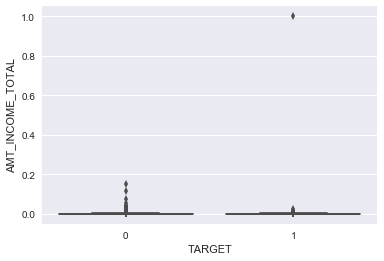

In [743]:
sns.boxplot(x=t,y=df_train_mod['AMT_INCOME_TOTAL'])

In [702]:
df_test_mod.isnull().sum()

OCCUPATION_TYPE_STAFF                                0
CODE_GENDER_MALE                                     0
FLAG_OWN_REALTY_YES                                  0
FLAG_OWN_CAR_YES                                     0
ORGANIZATION_TYPE_Industry                           0
ORGANIZATION_TYPE_Transport                          0
ORGANIZATION_TYPE_Business Entity                    0
ORGANIZATION_TYPE_XNA                                0
ORGANIZATION_TYPE_Other                              0
ORGANIZATION_TYPE_Misc                               0
NAME_CONTRACT_TYPE_CASH                              0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Unemployed                          0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCA

In [121]:
set(df_train_mod)-set(df_test_mod)

set()

In [122]:
set(df_test_mod)-set(df_train_mod)

set()

In [123]:
test_X = df_test_mod.values

In [124]:
pred_prob = random_search.predict_proba(test_X)

In [712]:
type(pred_prob)

numpy.ndarray

In [125]:
df_test.shape

(48744, 72)

In [126]:
df_pred_prob = pd.DataFrame(pred_prob,columns=['Zero','One'])

In [127]:
df_pred_prob['SK_ID_CURR'] = df_test['SK_ID_CURR']

In [128]:
df_pred_prob.to_csv('data/hcredit/df_pred_prob.csv')

In [719]:
import seaborn as sns

In [723]:
#list(df_train_cont.columns)
t = df_train['TARGET']
amt = df_train['AMT_INCOME_TOTAL']

In [726]:
%matplotlib inline

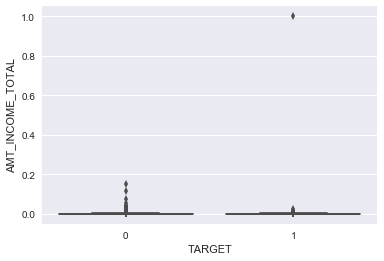

In [743]:
sns.boxplot(x=t,y=df_train_mod['AMT_INCOME_TOTAL'])

0         Axes(0.1,0.15;0.363636x0.75)
1    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

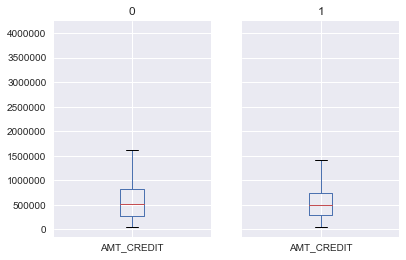

In [735]:
trgt_grpby = df_train.groupby('TARGET')
trgt_grpby.boxplot(column=['AMT_CREDIT'])

In [747]:
import matplotlib.pyplot as plt
sns.pairplot(df_train_cont, kind="scatter") 
plot.show() 


KeyboardInterrupt: 